<a href="https://colab.research.google.com/github/Ashi9502/Accelerated_Computer_Science_Fundamentals_Specialization/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as op
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('ex2data1.csv')

In [3]:
df['e1score'].describe()

count    100.000000
mean      65.644274
std       19.458222
min       30.058822
25%       50.919511
50%       67.032988
75%       80.212529
max       99.827858
Name: e1score, dtype: float64

In [4]:
df['e2score'].describe()

count    100.000000
mean      66.221998
std       18.582783
min       30.603263
25%       48.179205
50%       67.682381
75%       79.360605
max       98.869436
Name: e2score, dtype: float64

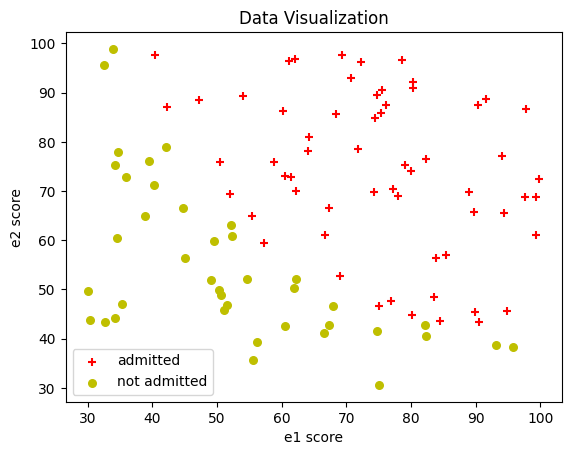

In [6]:
def plot_data():
    # positive
    p1 = plt.scatter(
        df[df.admission == 1]['e1score'],
        df[df.admission == 1]['e2score'],
        color="r",
        marker="+",
        s=30
    )

    # negative
    p2 = plt.scatter(
        df[df.admission == 0]['e1score'],
        df[df.admission == 0]['e2score'],
        color="y",
        marker="o",
        s=30
    )

    # putting labels
    plt.xlabel('e1 score')
    plt.ylabel('e2 score')
    plt.legend([p1, p2], ['admitted', 'not admitted'], loc='lower left')

    # title
    plt.title('Data Visualization')

    # function to show plot
    plt.show()
plot_data()

In [7]:
X = pd.DataFrame([df.e1score, df.e2score]).transpose().to_numpy()
m, n = X.shape

X = np.append(np.ones([m, 1]), X, axis=1)
X.shape

(100, 3)

In [8]:
y = df.admission.to_numpy()
y.size

100

In [9]:
def sigmoid(z):
    return np.ones(z.shape) / (1 + np.exp(-z))

sigmoid(np.zeros([1,1]))

array([[0.5]])

In [10]:
def sigmoid_cost(theta, X, y):
    m = y.size
    z = X.dot(theta)
    h = sigmoid(z)
    J = np.sum(- y.dot(np.log(h)) - (1-y).dot(np.log(1-h)))
#     J = -y.transpose().dot(np.log(h)) - (1-y.transpose()).dot(np.log(1-h))
    return J / m

sigmoid_cost(
    theta=np.zeros([n+1, 1]),
    X=X,
    y=y
)

0.6931471805599453

In [11]:
def sigmoid_grad(theta, X, y):
    m = y.size
    z = X.dot(theta)
    h = sigmoid(z)
    grad = 1/m * np.sum(np.dot((h-y), X), axis=0)
#     grad = 1/m * (h-y).transpose().dot(X)
    return grad

sigmoid_grad(
    theta=np.zeros([n+1, 1]),
    X=X,
    y=y
)

array([  -10.        , -1200.92165893, -1126.28422055])

In [12]:
options = {'full_output': True, 'maxiter': 400}
theta, cost, _, _, _ = op.fmin(
    lambda t: sigmoid_cost(t, X, y),
    np.zeros([n+1, 1]),
    **options
)
print()
print('theta:', theta)
print('cost:', cost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287

theta: [-25.16130062   0.20623142   0.20147143]
cost: 0.20349770159021519


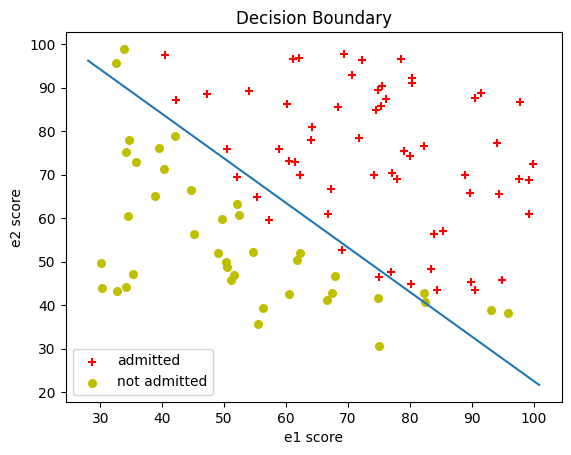

In [14]:
def plot_decision_boundary():
    # plotting the actual points as scatter plot
    p1 = plt.scatter(
        df[df.admission == 1]['e1score'],
        df[df.admission == 1]['e2score'],
        color="r",
        marker="+",
        s=30
    )
    p2 = plt.scatter(
        df[df.admission == 0]['e1score'],
        df[df.admission == 0]['e2score'],
        color="y",
        marker="o",
        s=30
    )
    px = np.array([np.min(X[:,1])-2, np.max(X[:,2])+2])
    py = (-1 / theta[2]) * (theta[1]*px + theta[0])
    plt.plot(px, py)

    # putting labels
    plt.xlabel('e1 score')
    plt.ylabel('e2 score')
    plt.legend([p1, p2], ['admitted', 'not admitted'], loc='lower left')
    plt.title('Decision Boundary')

    # function to show plot
    plt.show()

plot_decision_boundary()

In [15]:
def predict(e1score, e2score):
    print("For a student with scores %s and %s, we predict an admission probability of %f" % (
        e1score,
        e2score,
        sigmoid(np.array([1, e1score, e2score]).dot(theta))
    ))

In [16]:
predict(45, 85)

For a student with scores 45 and 85, we predict an admission probability of 0.776292


In [17]:
predict(30, 45)

For a student with scores 30 and 45, we predict an admission probability of 0.000050
